# Rectangle Classifier in TensorFlow

DeepGreen Workshop

November 7, 2019

Code by Lauren Hayward

Within this notebook, you can modify the code and execute each cell using `Shift+Enter` (on a laptop) or using the play button (on a phone).

### Read in the input data from file:

In [9]:
import numpy as np #Needed to use various mathematical functions

L=3 #the input is an LxL image
x_train = np.loadtxt( 'x_L%d.txt' %L, dtype='uint8' ) #data points
y_train = np.loadtxt( 'y_L%d.txt' %L, dtype='uint8' ) #labels
N_train = x_train.shape[0] #number of data points in the file
print("Number of training examples = %d" %N_train)

Number of training examples = 350


### Define the neural network:

In [14]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt #for plotting
import tensorflow as tf         #for creating and training a neural network

tf.set_random_seed(999)

### Create placeholders for the input data and labels ###
### (we'll input actual values when we ask TensorFlow to run an actual computation) ###
x = tf.placeholder(tf.float32, [None, L*L]) # input data
y = tf.placeholder(tf.int32,   [None])      # labels

# ### Layer 1: ###
# W1 = tf.Variable( tf.random_normal([L*L, 1], mean=0.0, stddev=0.01, dtype=tf.float32) )
# b1 = tf.Variable( tf.zeros([1]) )
# z1 = tf.matmul(x, W1) + b1
# a1 = tf.nn.sigmoid( z1 )

# ### Network output: ###
# aL = a1

### SOLUTION TO EXERCISE: ###

n_hidden=2
### Layer 1: ###
W1 = tf.Variable( tf.random_normal([L*L, n_hidden], mean=0.0, stddev=0.01, dtype=tf.float32) )
b1 = tf.Variable( tf.zeros([n_hidden]) )
z1 = tf.matmul(x, W1) + b1
a1 = tf.nn.sigmoid( z1 )
#a1 = tf.nn.relu( z1 ) ### SOLUTION FOR CHANGING THE ACTIVATION FUNCTION ###

### Layer 2: ###
W2 = tf.Variable( tf.random_normal([n_hidden, 1], mean=0.0, stddev=0.01, dtype=tf.float32) )
b2 = tf.Variable( tf.zeros([1]) )
z2 = tf.matmul(a1, W2) + b2
a2 = tf.nn.sigmoid( z2 )

### Network output: ###
aL = a2

### END OF SOLUTION TO EXERCISE ###

### Cost function (measures how far off our model is from the labels): ###
y_vec = tf.one_hot(y,depth=1, on_value=0.0, off_value=1.0) # labels are converted to vectors
mse = tf.reduce_mean( tf.reduce_sum( tf.square(y_vec - aL), reduction_indices=[1] ) )
cost_func = mse

### Algorithm used for training: ###
learning_rate  = 1.0 # hyperparameter
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_func) 

### Train the neural network:

After 20000 epochs:
  Training cost 0.012452
  Training accuracy 0.991429



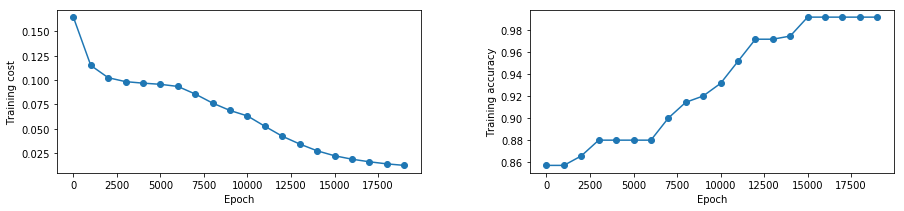

In [15]:
N_epochs = 20000 # number of times to run gradient descent

sess = tf.Session()
sess.run(tf.global_variables_initializer())

epoch_list = []
cost_list  = []
acc_list   = []

############ Function for plotting: ############
def updatePlot():
    ### Plot the cost function during training: ###
    plt.subplot(121)
    plt.plot(epoch_list,cost_list,'o-')
    plt.xlabel('Epoch')
    plt.ylabel('Training cost')

    ### Plot the training accuracy: ###
    plt.subplot(122)
    plt.plot(epoch_list,acc_list,'o-')
    plt.xlabel('Epoch')
    plt.ylabel('Training accuracy')
############ End of plotting function ############

### Train for several epochs: ###
for epoch in range(N_epochs):
    sess.run(train_step, feed_dict={x: x_train, y:y_train}) #run gradient descent
    
    ### Update the plot and print results every 1000 epochs: ###
    if epoch % 1000 == 0:
        cost = sess.run(cost_func,feed_dict={x:x_train, y:y_train})
        
        NN_output = sess.run(aL,feed_dict={x:x_train, y:y_train})
        NN_output = NN_output.flatten()
        predicted_class = np.round(NN_output).astype(int)
        accuracy = np.mean(predicted_class == y_train)
    
        epoch_list.append(epoch)
        cost_list.append(cost)
        acc_list.append(accuracy)
        
        ### Update the plot of the resulting classifier: ###
        fig = plt.figure(2,figsize=(15,3))
        fig.subplots_adjust(hspace=.3,wspace=.3)
        plt.clf()
        updatePlot()
        display.display(plt.gcf())
        display.clear_output(wait=True)
        #time.sleep(0.1) #Uncomment this line if you want to slow down the rate of plot updates
        
print( "After %d epochs:\n  Training cost %f\n  Training accuracy %f\n" % (N_epochs, cost, accuracy) )

### Look at the weights and biases after training:

In [6]:
W1_end = sess.run(W1)
print("W1:")
print(W1_end)

b1_end = sess.run(b1)
print("\nb1:")
print(b1_end)

W1:
[[-0.15409529  4.9266896  -0.6413342   0.38514006]
 [ 1.6168237   0.86640126  2.4978943   0.69211316]
 [ 2.0232532  -0.09522728 -0.3151996   6.2070975 ]
 [ 1.3317564   2.8280053   2.6071568  -2.5009825 ]
 [ 3.2206156  -1.070281    6.72519    -3.544359  ]
 [ 2.7807972  -1.9556484   3.7654004   4.4794264 ]
 [ 0.6200755   4.678574    1.7342536  -0.5755417 ]
 [ 2.7746344  -1.2257407   3.48678     2.3029056 ]
 [ 1.4685632   0.1883951   0.8218518   5.450965  ]]

b1:
[-1.290034    0.6842105  -3.7467744   0.38573515]
